In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import nltk
import re
import string
from nltk.corpus import stopwords


In [2]:
df= pd.read_csv('jigsaw-toxic-comment-classification-challenge/train.csv')

comment_texts = df['comment_text']
toxic_val = df['toxic']
all_cat = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
df[:10]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


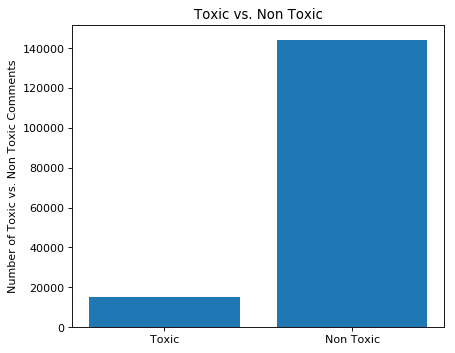

In [3]:
#Finding number of samples under toxic and non Toxic
x = ['Toxic','Non Toxic']
n_toxic = 0
toxic = 0
for index,element in enumerate(toxic_val):
    if element == 0:
        n_toxic += 1
    else: 
        toxic += 1
y = [toxic,n_toxic]        



def createBarFor(x,y,y_text,graph_title):
    index = np.arange(len(x))
    figure(num=None, figsize=(6,5), dpi=80, facecolor='w', edgecolor='r')
    plt.bar(index, y)
    plt.ylabel(y_text, fontsize=10)
    plt.xticks(index, x, fontsize=10, rotation=0)
    plt.title(graph_title)
    plt.show()

createBarFor(x,y,'Number of Toxic vs. Non Toxic Comments','Toxic vs. Non Toxic')

In [4]:
## Are there any non toxic which are severe_toxic,obscene,threat,insult or identity_hate. Let's make sure

def determineSamplesInEachMajorCategory(toxicOrNToxic):
    if toxicOrNToxic == 0:
        tOrNtvsAll = df[(df['toxic'] == 0) & ((df['severe_toxic'] ==1) | (df['obscene'] ==1) | (df['threat'] ==1) |(df['insult'] ==1) | (df['identity_hate'] ==1))]
    else:
        tOrNtvsAll = df[(df['toxic'] == 1) & ((df['severe_toxic'] ==1) | (df['obscene'] ==1) | (df['threat'] ==1) |(df['insult'] ==1) | (df['identity_hate'] ==1))]
        
    x = ['severe_toxic','obscene','threat','insult','identity_hate']
    y = []
    for i in x:
        y.append(len(tOrNtvsAll[(tOrNtvsAll[i] == 1)]))
    return [x,y]


    
#Non Toxic vs all
non_toxic_samples = determineSamplesInEachMajorCategory(0)

#Toxic vs all
toxic_samples = determineSamplesInEachMajorCategory(1)

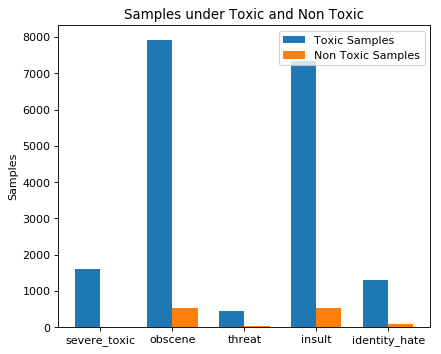

In [5]:
#plot both type of samples in the graph
N = len(non_toxic_samples[0])        #both are same so choose anyone
ind = np.arange(N) 
width = 0.35  
figure(num=None, figsize=(6,5), dpi=80, facecolor='w', edgecolor='r')
plt.bar(ind, toxic_samples[1], width, label='Toxic Samples')
plt.bar(ind + width, non_toxic_samples[1], width,
    label='Non Toxic Samples')

plt.ylabel('Samples')
plt.title('Samples under Toxic and Non Toxic')

plt.xticks(ind + width / 2, non_toxic_samples[0])
plt.legend(loc='best')
plt.show()

In [6]:
test = pd.read_csv('jigsaw-toxic-comment-classification-challenge/test.csv')
X_train = df['comment_text']
y_train = df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]
X_test = test
#X_train, X_test, y_train, y_test = train_test_split(df['comment_text'], df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']], test_size=0.2)

#### Now for the time being just focus on the one column i.e. toxic. We will classify them first. 

In [7]:
from nltk.stem import WordNetLemmatizer
##Tokenization

#punctuation removal
regex = re.compile('[%s]' % re.escape(string.punctuation))
#comment_texts = [regex.sub('',text.lower()) for text in comment_texts]

X_train_punc_removed = [regex.sub('',text.lower()) for text in X_train]
X_test_punc_removed = [regex.sub('',text.lower()) for text in X_test['comment_text']]

#tokenize comment texts
#token_comment_text = [nltk.word_tokenize(text) for text in comment_texts]
X_train_token = [nltk.word_tokenize(text) for text in X_train_punc_removed]
X_test_token = [nltk.word_tokenize(text) for text in X_test_punc_removed]

#lemmatize tokens 
lemmatizer = WordNetLemmatizer()


#stop words removal

stop_words = stopwords.words('english')
#filtered_tokens =  [[lemmatizer.lemmatize(w,pos="v") for w in comment if w not in stop_words] for comment in token_comment_text]
X_train_filtered_tokens = [[lemmatizer.lemmatize(w,pos="v") for w in comment if w not in stop_words] for comment in X_train_token]
X_test_filtered_tokens = [[lemmatizer.lemmatize(w,pos="v") for w in comment if w not in stop_words] for comment in X_test_token]

#filtered_comments = [' '.join(text) for text in filtered_tokens]
X_train = [' '.join(text) for text in X_train_filtered_tokens]
X_test = [' '.join(text) for text in X_test_filtered_tokens]
#filtered_comments[:10]

In [8]:
#open a file with list of swear words (the file consists of the words banned by Google)
#file = open("list.txt", "r")
#swear_words = []
#for x in file:
 # swear_words.append(x.replace('\n',''))

In [9]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(2,2))
#X_train_vectorized = vectorizer.fit_transform(filtered_comments)
#X_test_vectorized = vectorizer.transform(X_test)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#Replace each comment tokens with 0 or 1 if they are present in swear words
#x_train_vec = [[1 if token in swear_words else 0 for token in comment] for comment in X_train]
#x_test_vec = [[1 if token in swear_words else 0 for token in comment] for comment in X_test]

In [10]:
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
dict = {}
scores = []
submission = pd.DataFrame.from_dict({'id': test['id']})
for cat in all_cat:

    #clf = MultinomialNB()
    clf = LogisticRegression(C=4, dual=True)
    y_data = y_train[cat].values.tolist()
    clf.fit(X_train_vec,y_data)
    cv_score = np.mean(cross_val_score(clf, X_train_vec, y_data, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(cat, cv_score))
    submission[cat] = clf.predict_proba(X_test_vec)[:, 1]
    dict[cat] = clf

CV score for class toxic is 0.8850054960562842
CV score for class severe_toxic is 0.9299378679269384
CV score for class obscene is 0.9102354908469438
CV score for class threat is 0.8966721750938209
CV score for class insult is 0.9003731572715946
CV score for class identity_hate is 0.8707837912145694


In [11]:
print('Total CV score is {}'.format(np.mean(scores)))

submission.to_csv('submission.csv', index=False)

Total CV score is 0.8988346630683587


In [94]:
predicted = []
for cat in all_cat:
    clf = dict[cat]
    predicted.append(clf.predict(X_test_vec))
pred = np.array(predicted)
y_pred = pred.transpose()
y_test = np.array(y_test)

In [95]:
y_test[:,0]

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test[:,0], y_pred[:,0])
TP = conf[0,0]
FP = conf[0,1]
TN = conf[1,0]
FN = conf[1,1]

ValueError: Found input variables with inconsistent numbers of samples: [31915, 153164]